### Performing LDA topic modeling analysis on the extracted facebook data of Afrimash and their competitors

In [25]:
# THIS BLOCK SHOULD ONLY BE RUN ONCE!!!

# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [26]:
import os
import re
import pandas as pd
import nltk
import gensim
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
from wordcloud import WordCloud

# getting the files containing the data of facebook posts
root_data_path = '../data/Facebook data/processed'
files = os.listdir(root_data_path)
fb_posts_data = [root_data_path+'/'+file for file in files if 'posts' in file]

count = 1
for data in fb_posts_data:
    print('File {} ---> [{}]'.format(count, data))
    count = count + 1    

File 1 ---> [../data/Facebook data/processed/afrimash_posts.csv]
File 2 ---> [../data/Facebook data/processed/daydone_posts.csv]
File 3 ---> [../data/Facebook data/processed/easyagro_posts.csv]
File 4 ---> [../data/Facebook data/processed/farmcrowdy_posts.csv]
File 5 ---> [../data/Facebook data/processed/farmsquare_posts.csv]


In [27]:
#Actual work
def get_lemma(word):
    """Function to lemmatize a given word"""
    return WordNetLemmatizer().lemmatize(word)
get_lemma("crying")

'cry'

In [28]:
def clean(text):
    """Function to remove unnecessities from text e.g hashtags, urls, punctuations etc."""
    text = re.sub(r'\w*[\.@][^\s]*\.com', '', text) #Remove links of form 'www.something.com' and 'something@something.com'
    text = re.sub(r'http[s]?://[^\s]*', '', text) #Removes links of form 'http://something' and 'https://something'
    text = re.sub(r'#[^\s]*', '', text) #Removes hashtags
    text = re.sub(r'[^\w\s#]', '', text) #Removes any character that's not text, space, hash, or digit
    text = re.sub(r'\s+', ' ', text) #Removes excess whitespaces between text
    return text.strip()
    
text = """https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
fakjsfhkaj sfkajsfhs faskfjaskjadhfkjad
#hasgjhasd #jhakajhakf #kjhdkjfhf sdjhfs
sdfsmdkfjsd f      sdf       sf    sd fmdfsdlfnl , skdfs, lsksd. kdlkjsdflkn: dksns; KMSDKFLKNLSDFSS.
"""
print('ORIGINAL:')
print(text)
print('CLEANED:')
clean(text)

ORIGINAL:
https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0
fakjsfhkaj sfkajsfhs faskfjaskjadhfkjad
#hasgjhasd #jhakajhakf #kjhdkjfhf sdjhfs
sdfsmdkfjsd f      sdf       sf    sd fmdfsdlfnl , skdfs, lsksd. kdlkjsdflkn: dksns; KMSDKFLKNLSDFSS.

CLEANED:


'fakjsfhkaj sfkajsfhs faskfjaskjadhfkjad sdjhfs sdfsmdkfjsd f sdf sf sd fmdfsdlfnl skdfs lsksd kdlkjsdflkn dksns KMSDKFLKNLSDFSS'

In [29]:
def gen_wordcloud(long_string):
    """Function to generate a wordcloud from a given string"""
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000,
                          contour_width=3, contour_color='steelblue', width=1200, height=350)
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    display(wordcloud.to_image())

In [30]:
def prepare_text_for_lda(text):
    """Function to prepare text for LDA (performs tokenization, filtering tokens by length and stop words, and Lemmatization)"""
    text = clean(text)
    tokens = nltk.word_tokenize(text) #Tokenization
    tokens = [token for token in tokens if len(token) > 4] #Filtering tokens based on length
    stop_words = set(stopwords.words('english')) #Defining the stopwords
    tokens = [token for token in tokens if token not in stop_words] #Filtering tokens based on stop words
    tokens = [get_lemma(token) for token in tokens] #Lemmatization of given text
    tokens = [token.lower() for token in tokens]
    return tokens

In [31]:
def perform_lda(data_path, store_path):
    text_data = []
    with open(data_path, 'r', encoding='utf8') as f:
        for line in f:
            tokens = prepare_text_for_lda(line)
            text_data.append(tokens)

    dictionary = corpora.Dictionary(text_data) #creates a dictionary of all unique tokens in the text(each have their own id)
    #Create Bag of Words
    corpus = [dictionary.doc2bow(text) for text in text_data] #checks the occurrences of each word(in the dictionary) in each text in the text_data
    NUM_TOPICS = 3
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    ldamodel.save(store_path)
#     topics = ldamodel.print_topics(num_words=10)
#     for topic in topics:
#         print(topic)
    t = [",".join(txt) for txt in text_data]
    wordcloud_string = ",".join(t)
    return ldamodel, corpus, dictionary, wordcloud_string

In [32]:
import pyLDAvis
import pyLDAvis.gensim_models

def visualize_lda(ldamodel, corpus, dictionary):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
    display(vis)

-------------------------------------------------- LDA for afrimash --------------------------------------------------


 -------------------------------------------------- TOPICS IDENTIFIED: --------------------------------------------------
----> (0, '0.023*"afrimash" + 0.017*"farming" + 0.016*"training" + 0.014*"register" + 0.011*"online" + 0.010*"visit" + 0.010*"account" + 0.009*"poultry" + 0.008*"click" + 0.008*"farmer"')
----> (1, '0.014*"order" + 0.008*"place" + 0.007*"nationwide" + 0.007*"chick" + 0.007*"offer" + 0.006*"machine" + 0.006*"bird" + 0.006*"broiler" + 0.006*"click" + 0.006*"crate"')
----> (2, '0.021*"order" + 0.020*"place" + 0.017*"nationwide" + 0.015*"deliver" + 0.009*"poultry" + 0.007*"bird" + 0.007*"offer" + 0.006*"water" + 0.006*"product" + 0.005*"capacity"')


 -------------------------------------------------- WORDCLOUD: --------------------------------------------------


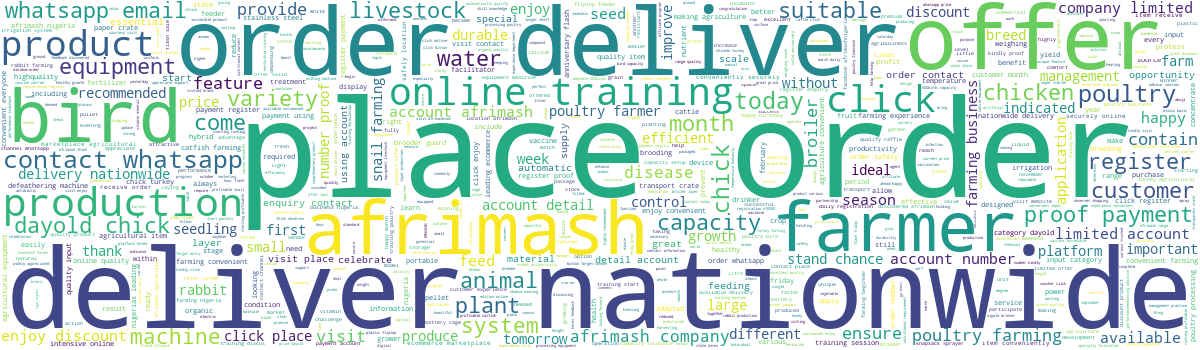



 -------------------------------------------------- LDA VISUALIZATION: --------------------------------------------------


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.125873  0.087106       1        1  38.423690
0      0.200358  0.016286       2        1  38.275001
1     -0.074486 -0.103392       3        1  23.301308, topic_info=           Term        Freq       Total Category  logprob  loglift
3      afrimash  402.000000  402.000000  Default  30.0000  30.0000
20     training  276.000000  276.000000  Default  29.0000  29.0000
7       farming  291.000000  291.000000  Default  28.0000  28.0000
15     register  239.000000  239.000000  Default  27.0000  27.0000
60       online  189.000000  189.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
438       month   40.604362  142.401650   Topic3  -5.5381   0.2019
176      farmer   43.260641  227.302801   Topic3  -5.4747  -0.2024
35      deliver   39.738343  290.892956   Topic3  -5.5596  -0.5340
120  production   35.107905  163.245658   Topic3  -5.6835  -0.0802
228     contact   32.683127  235.027388   Topic3  -5.7551  -0.5162

[233 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2205      2  0.049066  09135543827
2205      3  0.932251  09135543827
1         2  0.978892   2129087920
2775      3  0.969586     500birds
2         2  0.990830      account
...     ...       ...          ...
234       1  0.303641     whatsapp
234       2  0.428954     whatsapp
234       3  0.269903     whatsapp
559       2  0.986556       winner
2745      3  0.962631        youve

[354 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

-------------------------------------------------- LDA for daydone --------------------------------------------------


 -------------------------------------------------- TOPICS IDENTIFIED: --------------------------------------------------
----> (0, '0.021*"delivery" + 0.019*"order" + 0.013*"ibadan" + 0.012*"available" + 0.012*"doorstep" + 0.011*"chicken" + 0.010*"weekend" + 0.009*"another" + 0.008*"daydone" + 0.008*"delivered"')
----> (1, '0.021*"garri" + 0.006*"produce" + 0.006*"thing" + 0.006*"water" + 0.006*"service" + 0.005*"healthy" + 0.005*"ecommerce" + 0.005*"agric" + 0.005*"product" + 0.005*"think"')
----> (2, '0.013*"agric" + 0.011*"ginger" + 0.009*"dream" + 0.009*"produce" + 0.009*"farmer" + 0.009*"market" + 0.009*"product" + 0.008*"nigeria" + 0.007*"ecommerce" + 0.006*"farming"')


 -------------------------------------------------- WORDCLOUD: --------------------------------------------------


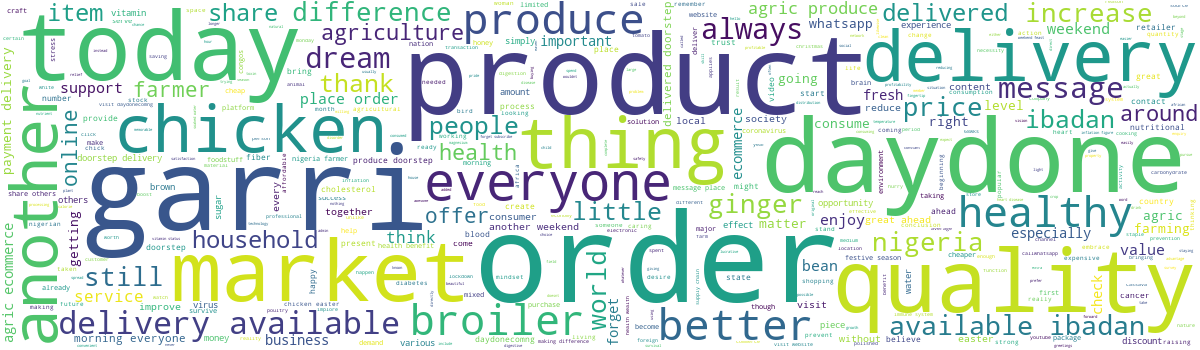



 -------------------------------------------------- LDA VISUALIZATION: --------------------------------------------------


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.115466 -0.000605       1        1  45.498077
1      0.058363 -0.082781       2        1  29.381474
2      0.057103  0.083386       3        1  25.120448, topic_info=           Term       Freq      Total Category  logprob  loglift
115       garri  27.000000  27.000000  Default  30.0000  30.0000
17       ibadan  27.000000  27.000000  Default  29.0000  29.0000
1224     ginger  12.000000  12.000000  Default  28.0000  28.0000
270   available  24.000000  24.000000  Default  27.0000  27.0000
23      weekend  19.000000  19.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
136       going   3.643960   7.804875   Topic3  -5.7134   0.6198
36     everyone   4.898680  24.572067   Topic3  -5.4175  -0.2312
100       still   3.993584  13.262237   Topic3  -5.6218   0.1813
1068      fresh   3.628974   8.780382   Topic3  -5.7176   0.4979
117     quality   3.773382  21.893781   Topic3  -5.6785  -0.3767

[208 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
10        1  0.861469  08174993336
10        2  0.107684  08174993336
490       3  0.873637        68wks
1530      3  0.962139       access
305       1  0.860632   affordable
...     ...       ...          ...
155       2  0.841447        worth
927       1  0.120296        would
927       2  0.120296        would
927       3  0.721776        would
929       3  0.962099        young

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

-------------------------------------------------- LDA for easyagro --------------------------------------------------


 -------------------------------------------------- TOPICS IDENTIFIED: --------------------------------------------------
----> (0, '1.000*"message"')
----> (1, '1.000*"message"')
----> (2, '1.000*"message"')


 -------------------------------------------------- WORDCLOUD: --------------------------------------------------


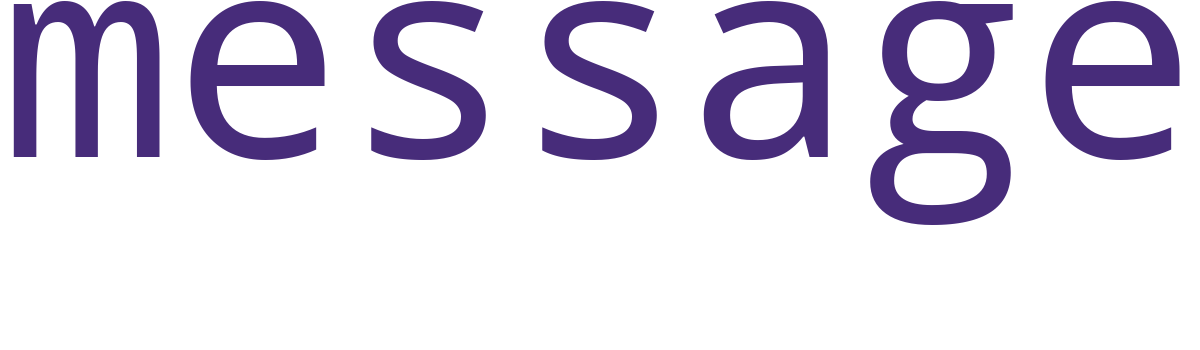



 -------------------------------------------------- LDA VISUALIZATION: --------------------------------------------------


PreparedData(topic_coordinates=         x    y  topics  cluster       Freq
topic                                      
1      0.0  0.0       1        1  44.533010
2      0.0  0.0       2        1  27.899124
0      0.0  0.0       3        1  27.567866, topic_info=      Term      Freq  Total Category  logprob  loglift
0  message  1.000000    1.0  Default      1.0      1.0
0  message  0.445330    1.0   Topic1      0.0      0.0
0  message  0.278991    1.0   Topic2      0.0      0.0
0  message  0.275679    1.0   Topic3      0.0      0.0, token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=1, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

-------------------------------------------------- LDA for farmcrowdy --------------------------------------------------


 -------------------------------------------------- TOPICS IDENTIFIED: --------------------------------------------------
----> (0, '0.018*"farmcrowdy" + 0.011*"business" + 0.010*"onyeka" + 0.009*"amazing" + 0.008*"nigeria" + 0.008*"happy" + 0.008*"africa" + 0.008*"today" + 0.007*"akumah" + 0.007*"founder"')
----> (1, '0.018*"farmcrowdy" + 0.014*"agriculture" + 0.012*"farmer" + 0.010*"happy" + 0.007*"nigeria" + 0.007*"month" + 0.007*"foods" + 0.007*"monday" + 0.007*"today" + 0.006*"ginger"')
----> (2, '0.028*"comment" + 0.028*"section" + 0.013*"answer" + 0.011*"trivia" + 0.010*"nigeria" + 0.009*"farmer" + 0.009*"world" + 0.008*"amazing" + 0.007*"fruit" + 0.006*"thank"')


 -------------------------------------------------- WORDCLOUD: --------------------------------------------------


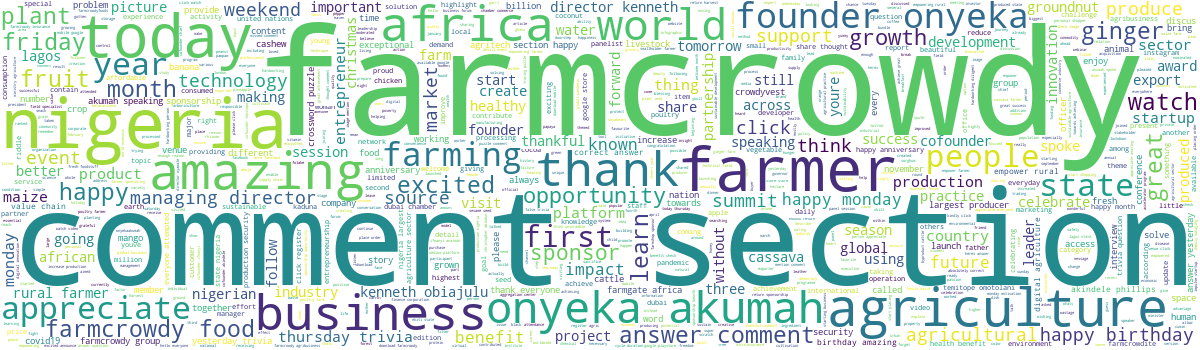



 -------------------------------------------------- LDA VISUALIZATION: --------------------------------------------------


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.054585  0.109918       1        1  36.092356
0     -0.086783 -0.094406       2        1  35.981855
2      0.141368 -0.015513       3        1  27.925789, topic_info=         Term        Freq       Total Category  logprob  loglift
36    comment  154.000000  154.000000  Default  30.0000  30.0000
43    section  152.000000  152.000000  Default  29.0000  29.0000
31     answer   73.000000   73.000000  Default  28.0000  28.0000
47     trivia   58.000000   58.000000  Default  27.0000  27.0000
774     foods   46.000000   46.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
769  everyone   18.685627   50.237922   Topic3  -5.6178   0.2866
227     today   22.063679  115.784427   Topic3  -5.4516  -0.3822
354     plant   16.535989   38.638139   Topic3  -5.7400   0.4269
239     watch   16.991778   50.277465   Topic3  -5.7128   0.1908
4       happy   17.267074  137.365679   Topic3  -5.6967  -0.7982

[219 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1375      1  0.943448       25000
2098      1  0.909755      6month
2250      1  0.087656  absolutely
2250      2  0.175313  absolutely
2250      3  0.788908  absolutely
...     ...       ...         ...
142       1  0.437202        year
142       2  0.317965        year
142       3  0.238474        year
137       1  0.149820       young
137       2  0.848982       young

[335 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

-------------------------------------------------- LDA for farmsquare --------------------------------------------------


 -------------------------------------------------- TOPICS IDENTIFIED: --------------------------------------------------
----> (0, '0.007*"plant" + 0.007*"seed" + 0.007*"cassava" + 0.007*"production" + 0.007*"business" + 0.006*"market" + 0.006*"tomato" + 0.006*"capacity" + 0.006*"water" + 0.005*"fruit"')
----> (1, '0.024*"order" + 0.021*"turkey" + 0.019*"cockerel" + 0.017*"zartech" + 0.015*"08135196537" + 0.014*"thursdays" + 0.013*"08135909974" + 0.012*"local" + 0.012*"updated" + 0.012*"number"')
----> (2, '0.013*"plant" + 0.012*"fertilizer" + 0.009*"farmer" + 0.007*"poultry" + 0.006*"nutrient" + 0.006*"calcium" + 0.006*"crop" + 0.005*"happy" + 0.005*"water" + 0.005*"growth"')


 -------------------------------------------------- WORDCLOUD: --------------------------------------------------


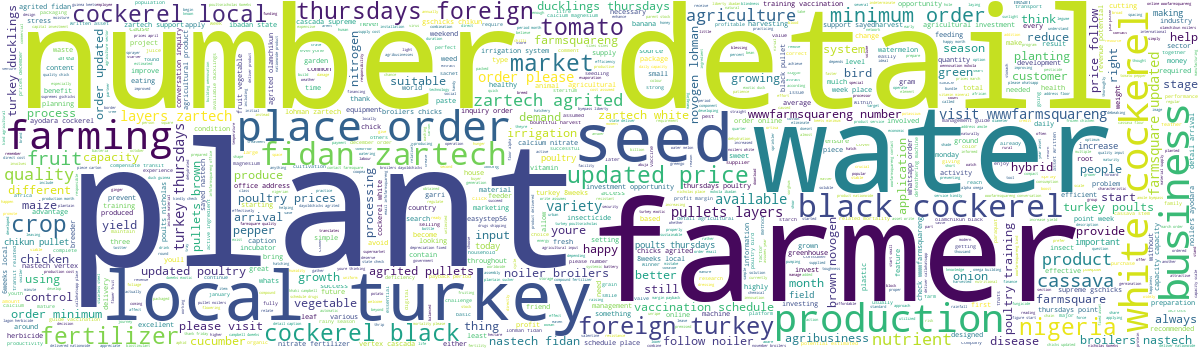



 -------------------------------------------------- LDA VISUALIZATION: --------------------------------------------------


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.106668  0.089429       1        1  43.770520
1      0.180867  0.011384       2        1  32.879475
2     -0.074198 -0.100813       3        1  23.350005, topic_info=            Term        Freq       Total Category  logprob  loglift
107       turkey  109.000000  109.000000  Default  30.0000  30.0000
20         order  138.000000  138.000000  Default  29.0000  29.0000
87      cockerel   98.000000   98.000000  Default  28.0000  28.0000
111      zartech   88.000000   88.000000  Default  27.0000  27.0000
105    thursdays   70.000000   70.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
40   08135909974   12.527259   96.403960   Topic3  -5.6757  -0.5861
39   08135196537   12.403363  106.680991   Topic3  -5.6857  -0.6973
212      nigeria   10.489620   43.280544   Topic3  -5.8533   0.0373
43     available   10.294282   37.343846   Topic3  -5.8721   0.1660
45        number   11.277197  102.123471   Topic3  -5.7809  -0.7488

[202 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
39        1  0.159354      08135196537
39        2  0.731152      08135196537
39        3  0.112485      08135196537
40        1  0.165968      08135909974
40        2  0.705365      08135909974
...     ...       ...              ...
33        3  0.018379  wwwfarmsquareng
359       1  0.611163            youre
359       2  0.192999            youre
359       3  0.192999            youre
111       2  0.993042          zartech

[301 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [33]:
organizations = ['afrimash', 'daydone', 'easyagro', 'farmcrowdy', 'farmsquare']
model_paths = ['models/'+org for org in organizations] #path to store created models

for file, model_path, organization in zip(fb_posts_data, model_paths, organizations):
    ldamodel, corpus, dictionary, wordcloud_string = perform_lda(file, model_path)
    topics = ldamodel.print_topics(num_words=10) #get topics form the returned model
    print("-"*50, "LDA for {}".format(organization), "-"*50)
    #Print identified topics
    print("\n\n", "-"*50, "TOPICS IDENTIFIED:", "-"*50)
    for topic in topics:
        print("---->",topic)
    #Generate Word cloud form returned word cloud string
    print("\n\n", "-"*50, "WORDCLOUD:", "-"*50)
    gen_wordcloud(wordcloud_string)
    print("\n\n", "-"*50, "LDA VISUALIZATION:", "-"*50)
    #Visualize the model
    visualize_lda(ldamodel, corpus, dictionary)
#     break

In [69]:
# # TO PRINT RESULTS OF SAVED MODELS
# for path in model_paths[0]:
#     model = LdaModel.load(path)
#     gen_wordcloud(wordcloud_string)
#     visualize_lda(model)
#     print(model.print_topics())

In [68]:
# from gensim.models.ldamodel import LdaModel

# new_model = LdaModel.load('model5.gensim')
# new_model.print_topics()

### Logic of the Previous Cell (The one above)<br>
#### Note:
Each dataset comprises facebook posts of Afrimash and her competitors.<br>
Each entry/row/line in the data set is considered a document on its own (seeing as each one represents a different facebook post)<br><br>
#### The Goal:
The goal is to identify topics being discussed in their posts<br><br>
#### Code Explanation:
<ol>
<li>"dictionary = corpora.Dictionary(text_data)"<br>
Creates a dictionary of all the unique words/tokens in the text_data ["text_data" contains a list of tokens for each entry in the dataset]</li><br><br>
<li>"corpus = [dictionary.doc2bow(text) for text in text_data]"<br>
This runs the entire dictionary against each entry of tokens in the text_data and returns the id of whatever token occurs in that particular entry and it's count (number of times it cooured in that entry).</li>
</ol>

In [ ]:
#MY ARCHAIC MODE OF DOING RE.SUB() BEFORE I SAW THE LIGHT

# url_pattern = re.compile(r'http[s]?://[^\s]*') #RegEx definition of a URL
#     hashtag_pattern = re.compile(r'#[^\s]*') #RegEx definition of a hashtag
#     url_matches = url_pattern.finditer(text) #Find all string in the text that match the RegEx
#     hashtag_matches = hashtag_pattern.finditer(text) #Find all string in the text that match the RegEx
#     dirt = [] #List to contain all urls and hastags found in text
#     for match in url_matches:
#         begn, end = match.span() #Gets the beginnig and end index of the string that matches the URL RegEx
#         dirt.append(text[begn:end])
#     for match in hashtag_matches:
#         begn, end = match.span() #Gets the beginnig and end index of the string that matches the Hashtag RegEx
#         dirt.append(text[begn:end])
#     if len(dirt) == 0:
#         return text.strip() #If no URLs or hashtgags found, return the text back as it is
#     else:
#         #Iterate over each URL/Hashtag found and remove them
#         for single_dirt in dirt:
#             text = text.replace(single_dirt, '')
#         return text.strip()